# Climate Change on Agriculture

Group 1

As global temperatures rise and precipitation patterns change, agricultural practices are forced to adapt. Understanding how climate and adaptation strategies impact crop yields and economic outcomes is crucial for mitigating the effects of climate change on food production.
By analyzing how different regions are responding to climate variability, we can identify successful strategies that could be applied globally to ensure food security.

#### The data
This dataset includes agricultural data from 1990 to 2024, covering a wide range of crops, countries, and regions. It tracks factors like temperature, precipitation, CO2 emissions, crop yields, and economic impacts.
Size of Data: The dataset contains 10,000 records across 10 countries, with 10 attributes per entry, including crop types, climate data, and adaptation strategies.

Attributes: 
- Year (1990 - 2024)
- Country
- Crop Type (barley, coffee, corn, cotton, fruits, rice, soybeans, sugarcane, vegetables, wheat)
- Average Temperature (°C)
- Total Precipitation (mm)
- CO2 Emissions (metric tons)
- Crop Yield (metric tons per hectare)
- Extreme Weather Events (0 - 10)
- Irrigation Access (0 - 100)
- Pesticide Use (kilogram per hectare)
- Fertilizer Use (kilogram per hectare)
- Soil Health Index (0 - 100)
- Adaption Strategies (crop rotation, drought-resistant crops, organic farming, water management, no adaptation)
- Economic Impact (in million USD)

In [30]:
# data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import plotly.graph_objects as go
import geopandas as gpd


data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

data.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

## Global Overview of Climate Change and Agriculture


#### Global Climate Change

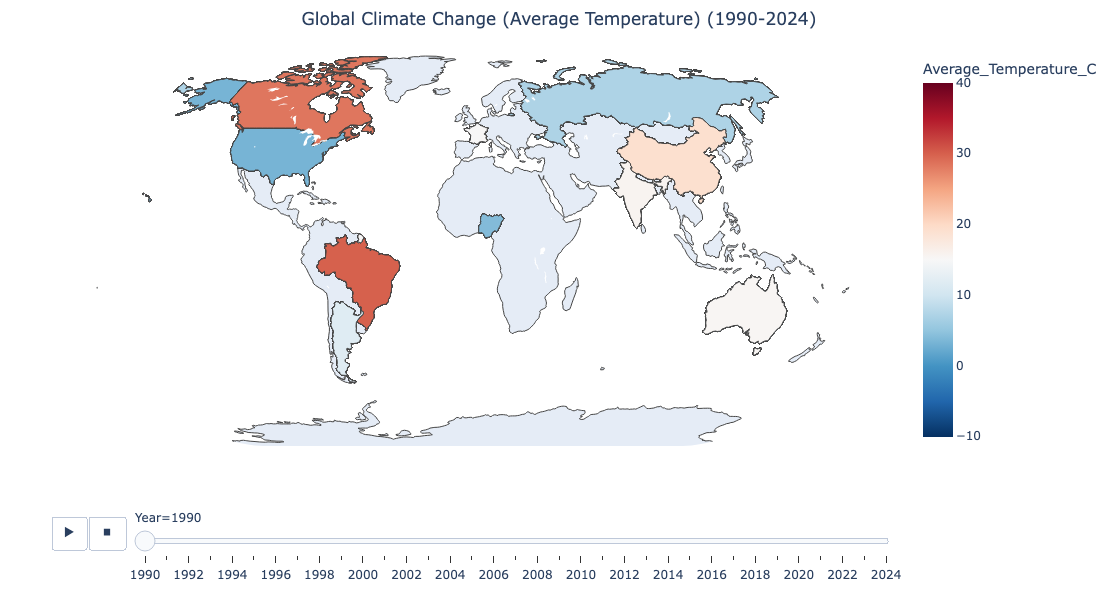

In [31]:
# Convert 'Year' column to integer and sort chronologically
data['Year'] = data['Year'].astype(int)
data = data.sort_values(by='Year')

# Convert 'Year' to string for the animation frame
data['Year'] = data['Year'].astype(str)

# Calculate min and max temperature per year for dynamic color range
min_max_temperature = data.groupby('Year')['Average_Temperature_C'].agg(['min', 'max']).to_dict('index')

# Function to set dynamic color range for each year
def get_color_range(year):
    return [min_max_temperature[year]['min'], min_max_temperature[year]['max']]

# Create the choropleth map for global temperature change
fig = px.choropleth(
    data,
    locations="Country",
    locationmode="country names",
    color="Average_Temperature_C",
    hover_name="Country",
    animation_frame="Year",
    title="Global Climate Change (Average Temperature) (1990-2024)",
    color_continuous_scale="RdBu_r",  # Reversed color scale: Red for cold, Blue for warm
    range_color=[-10, 40]  # Adjust range to match the typical global temperature scale
)

# Adjust color scale dynamically for each frame
for frame in fig.frames:
    year = frame.name
    color_range = get_color_range(year)
    for data_trace in frame.data:
        data_trace.update(zmin=color_range[0], zmax=color_range[1])

# Layout
fig.update_layout(
    geo=dict(
        showframe=False,
    showcoastlines=True,
    projection_type="natural earth"
    ),
    title_x=0.5,
    width=1000,
    height=600,
    legend_title="Temperature (°C)",
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

Show rise in extreme weather events and CO2 emissions. This would then give context to the below visualizations as viewers would see a strong correlation between increase in extreme weather and emissions and a decrease in crop yield. 

   Year  CO2_Emissions_MT  Extreme_Weather_Events
0  1990           3724.56                    1283
1  1991           4835.69                    1509
2  1992           4082.19                    1423
3  1993           3860.16                    1325
4  1994           4841.68                    1578


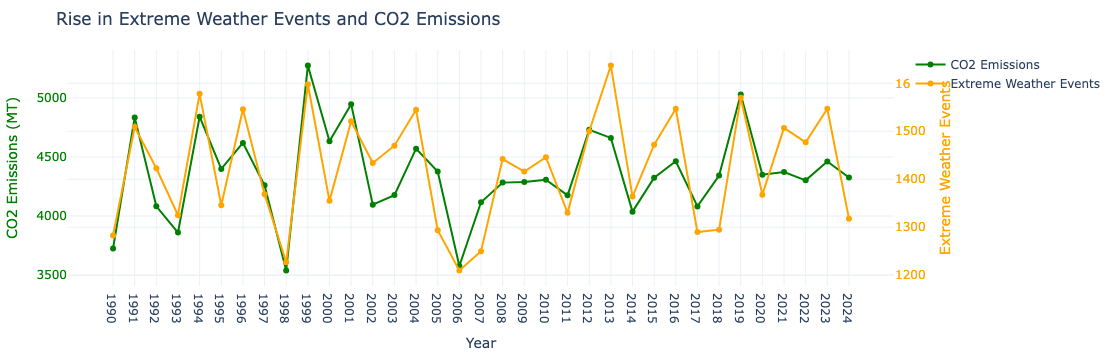

In [32]:
# Aggregate data by Year
agg_data = data.groupby("Year").agg({
    "CO2_Emissions_MT": "sum",
    "Extreme_Weather_Events": "sum" 
}).reset_index()

# Check the resulting aggregated data
print(agg_data.head())


fig = go.Figure()

# CO2 Emissions
fig.add_trace(go.Scatter(
    x=agg_data["Year"],
    y=agg_data["CO2_Emissions_MT"],
    mode="lines+markers",
    name="CO2 Emissions",
    line=dict(color="green")
))

# Extreme Weather Events
fig.add_trace(go.Scatter(
    x=agg_data["Year"],
    y=agg_data["Extreme_Weather_Events"],
    mode="lines+markers",
    name="Extreme Weather Events",
    line=dict(color="orange"),
    yaxis="y2"
))

fig.update_layout(
    title="Rise in Extreme Weather Events and CO2 Emissions",
    xaxis=dict(title="Year"),
    yaxis=dict(title="CO2 Emissions (MT)", titlefont=dict(color="green"), tickfont=dict(color="green")),
    yaxis2=dict(title="Extreme Weather Events", overlaying="y", side="right", titlefont=dict(color="orange"), tickfont=dict(color="orange")),
    template="plotly_white",
    margin=dict(l=40, r=120, t=50, b=40)
)

fig.show()


#### Visualization 1: Global Crop Yield Over Time

Map of crop yield over time across the globe

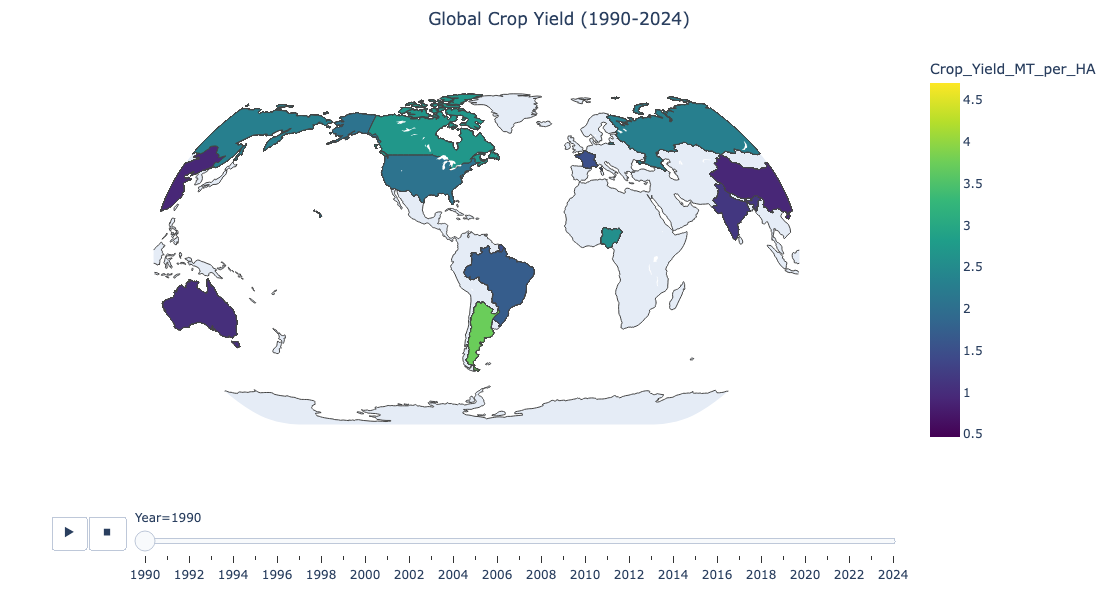

In [33]:
# Convert 'Year' column to integer and sort chronologically
data['Year'] = data['Year'].astype(int)
data = data.sort_values(by='Year')

# Convert 'Year' to string for the animation frame
data['Year'] = data['Year'].astype(str)

# Calculate min and max crop yields per year for dynamic color range
min_max_yields = data.groupby('Year')['Crop_Yield_MT_per_HA'].agg(['min', 'max']).to_dict('index')

# Function to set dynamic color range for each year
def get_color_range(year):
    return [min_max_yields[year]['min'], min_max_yields[year]['max']]

# Create the choropleth map for crop yield
fig = px.choropleth(
    data,
    locations="Country",
    locationmode="country names",
    color="Crop_Yield_MT_per_HA",
    hover_name="Country",
    animation_frame="Year",
    title="Global Crop Yield (1990-2024)",
    color_continuous_scale="Viridis"
)

# Adjust color scale dynamically for each frame
for frame in fig.frames:
    year = frame.name
    color_range = get_color_range(year)
    for data_trace in frame.data:
        data_trace.update(zmin=color_range[0], zmax=color_range[1])
# Layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    title_x=0.5,
    width=1000,
    height=600,
    legend_title="Crop Yield (MT per HA)",
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


#### Visualization 2: Temperature on Crop Yield
This chart identifies temperature thresholds where crop yields decline, while also taking into account severe weather events
### [Erica]: from here i would just note that ideal temperature seems to be around 10 - 20c

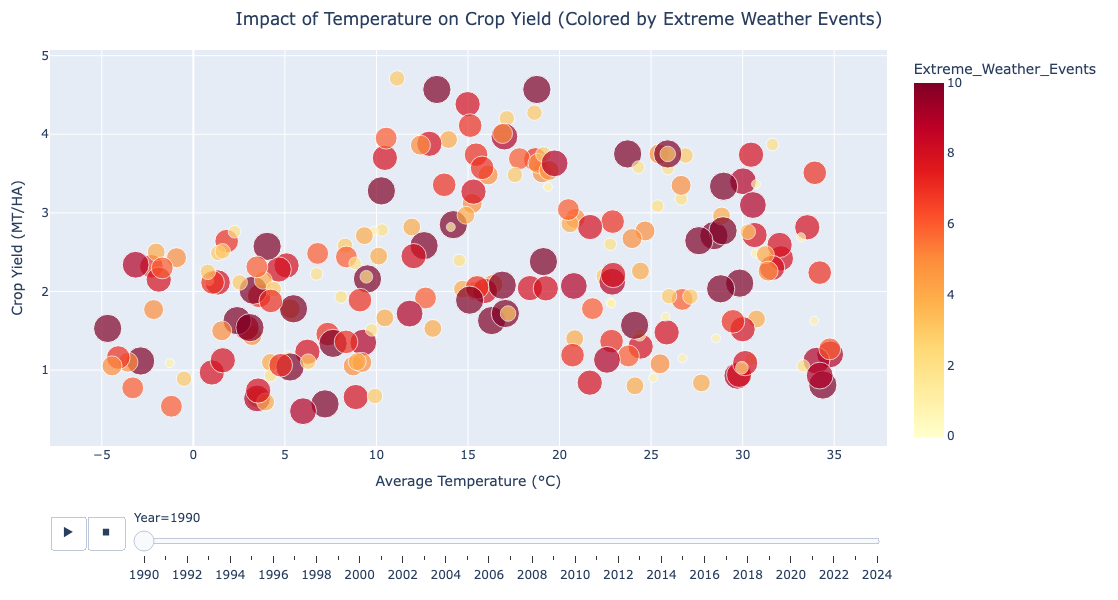

In [5]:
fig = px.scatter(
    data,
    x="Average_Temperature_C",
    y="Crop_Yield_MT_per_HA",
    color="Extreme_Weather_Events",
    size="Extreme_Weather_Events",
    hover_name="Country",
    animation_frame="Year",
    title="Impact of Temperature on Crop Yield (Colored by Extreme Weather Events)",
    color_continuous_scale="YlOrRd",
    labels={
        "Average_Temperature_C": "Average Temperature (°C)",
        "Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)"
    }
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()


## Impact on Crop Yields

Compare how different crop yields (3 top crops, rice wheat corn, other combo) over time. It shouldn't be a straight line, but it should def decrease over time.

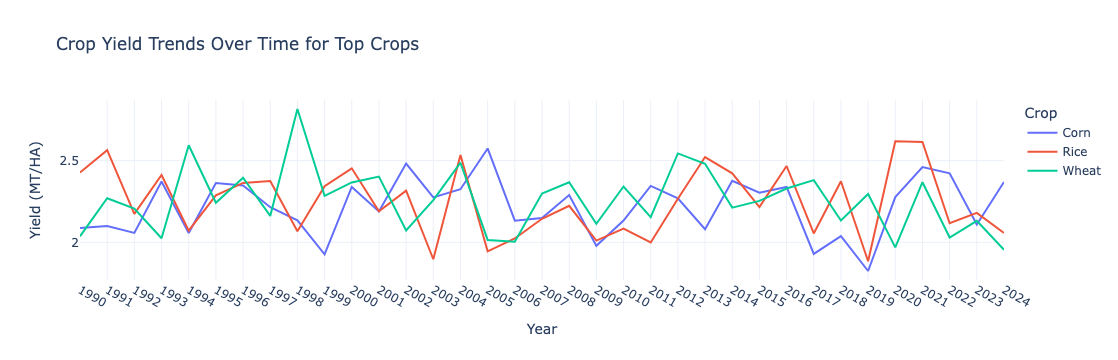

In [6]:
# filter data for specific crops
top_crops = ["Rice", "Wheat", "Corn"] # just chose 3 random crops
crop_data = data[data["Crop_Type"].isin(top_crops)]

# Aggregate yield data by crop type and year
crop_trends = crop_data.groupby(["Year", "Crop_Type"]).agg({
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

# Line plot for trends
import plotly.express as px

fig = px.line(
    crop_trends,
    x="Year",
    y="Crop_Yield_MT_per_HA",
    color="Crop_Type",
    title="Crop Yield Trends Over Time for Top Crops",
    labels={"Crop_Yield_MT_per_HA": "Yield (MT/HA)", "Crop_Type": "Crop"},
    template="plotly_white"
)
fig.show()


How have some regions done better and some done much worse as weather patterns change over time. Inevitably, the varying weather will lengthen some growing seasons and shorten others. Show this in a visualization.

### [Erica]: We should probably figure out which countries we want to focus on

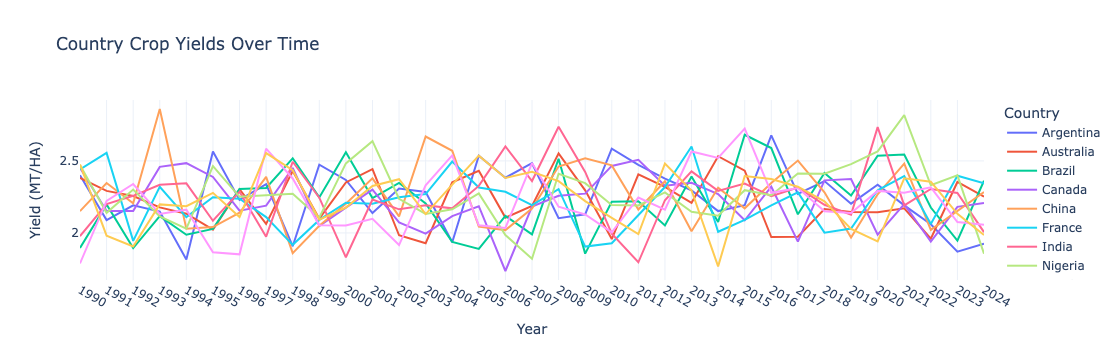

In [7]:
# Aggregate yield data by region and year
region_yields = data.groupby(["Year", "Country"]).agg({
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

# Line plot for regional crop yields over time
import plotly.express as px

fig = px.line(
    region_yields,
    x="Year",
    y="Crop_Yield_MT_per_HA",
    color="Country",
    title="Country Crop Yields Over Time",
    labels={
        "Crop_Yield_MT_per_HA": "Yield (MT/HA)",
        "Country": "Country",
        "Year": "Year"
    },
    template="plotly_white"
)
fig.show()


## Adaptions Strategies in Action and their Results

Show where different adaption strategies are being implemented. The different strategies will depend on what the changing weather in messing up. We can then compare/analyze how well they have worked to mitigate effects of changing climate.

In [8]:
# Aggregate data by adaptation strategies
strategy_effectiveness = data.groupby("Adaptation_Strategies").agg({
    "Crop_Yield_MT_per_HA": "mean",
    "Soil_Health_Index": "mean",
    "Economic_Impact_Million_USD": "mean"
}).reset_index()

strategy_effectiveness

Adaptation_Strategies  Crop_Yield_MT_per_HA  Soil_Health_Index  \
0            Crop Rotation              2.271590          64.523720   
1  Drought-resistant Crops              2.244425          65.176887   
2            No Adaptation              2.237939          64.914506   
3          Organic Farming              2.238188          64.996101   
4         Water Management              2.209385          64.889073   

   Economic_Impact_Million_USD  
0                   685.324149  
1                   686.226637  
2                   677.879363  
3                   663.542228  
4                   658.843997

Identify which have worked the best for improving/maintaing SOIL HEALTH AND/or crop yields.

### [Erica]: This also doesn't show a lot lol

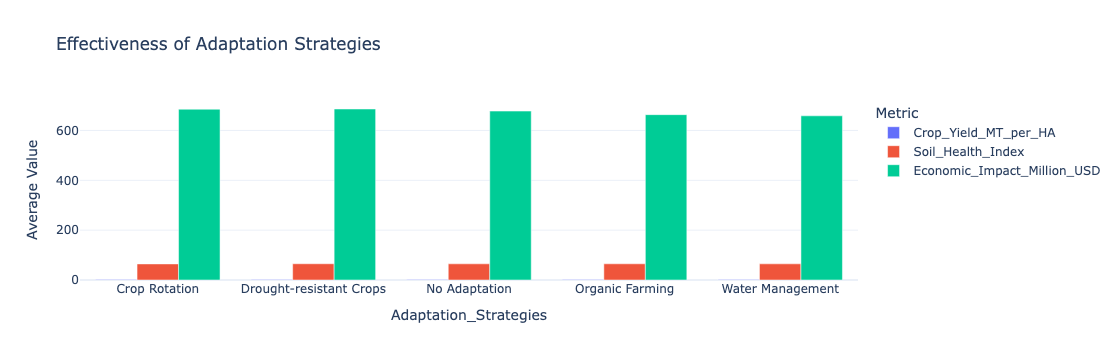

In [9]:
# Bar plot for strategy effectiveness
fig = px.bar(
    strategy_effectiveness,
    x="Adaptation_Strategies",
    y=["Crop_Yield_MT_per_HA", "Soil_Health_Index", "Economic_Impact_Million_USD"],
    title="Effectiveness of Adaptation Strategies",
    labels={"value": "Average Value", "variable": "Metric"},
    barmode="group",
    template="plotly_white"
)
fig.show()


## Economic Costs

Now let's see the economic impact on regions that did implement adaption strategies vs those that did not. Would be super cool to implement some kind of COST-BENEFIT ANALYSIS of different strategies that worked and then their impact on productivity/economy to see if they are worth while solutions, etc.

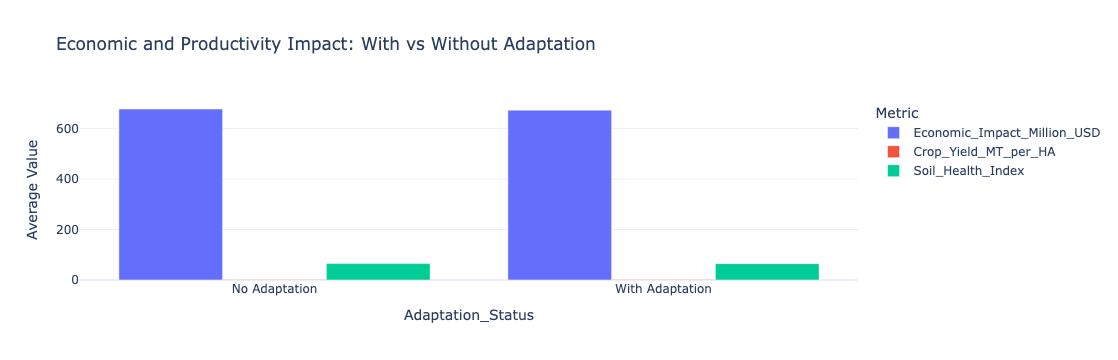

In [10]:
# create columns to classify regions as "With Adaptation" or "No Adaptation"
data["Adaptation_Status"] = "With Adaptation"
data.loc[data["Adaptation_Strategies"] == "No Adaptation", "Adaptation_Status"] = "No Adaptation"

# Group data by Adaptation Status
adaptation_analysis = data.groupby("Adaptation_Status").agg({
    "Economic_Impact_Million_USD": "mean",
    "Crop_Yield_MT_per_HA": "mean",
    "Soil_Health_Index": "mean",
}).reset_index()

adaptation_analysis


# Economic impact and productivity metrics
import plotly.express as px

fig = px.bar(
    adaptation_analysis,
    x="Adaptation_Status",
    y=["Economic_Impact_Million_USD", "Crop_Yield_MT_per_HA", "Soil_Health_Index"],
    title="Economic and Productivity Impact: With vs Without Adaptation",
    labels={"value": "Average Value", "variable": "Metric"},
    barmode="group",
    template="plotly_white"
)
fig.show()


## Effects of Modern Technology 

Would be potentially interesting and important to draw attention to how access to IRRIGATION, FERTILIZER, PESTICIDES, etc affects crop yields. We would probably find that countries with better access to more modern tech would have an easier time mitigating affects of climate change.

In [312]:
# Aggregate relevant data by region and year
tech_analysis = data.groupby(["Country", "Year"]).agg({
    "Crop_Yield_MT_per_HA": "mean",
    "Irrigation_Access_%": "mean",
    "Fertilizer_Use_KG_per_HA": "mean",
    "Pesticide_Use_KG_per_HA": "mean"
}).reset_index()

tech_analysis.head()



Country  Year  Crop_Yield_MT_per_HA  Irrigation_Access_%  \
0  Argentina  1990              2.400480            54.988400   
1  Argentina  1991              2.089216            50.496486   
2  Argentina  1992              2.192125            57.910000   
3  Argentina  1993              2.147947            55.880526   
4  Argentina  1994              1.815600            60.446000   

   Fertilizer_Use_KG_per_HA  Pesticide_Use_KG_per_HA  
0                 48.101200                26.308400  
1                 52.124324                28.136486  
2                 45.109583                29.538750  
3                 57.294737                25.887368  
4                 52.252400                23.214000

In [313]:
# Correlation for tech and crop yields (they're all pretty low idk)
tech_correlation = tech_analysis[["Crop_Yield_MT_per_HA", "Irrigation_Access_%", "Fertilizer_Use_KG_per_HA", "Pesticide_Use_KG_per_HA"]].corr()

tech_correlation

Crop_Yield_MT_per_HA  Irrigation_Access_%  \
Crop_Yield_MT_per_HA                  1.000000             0.000645   
Irrigation_Access_%                   0.000645             1.000000   
Fertilizer_Use_KG_per_HA             -0.071365             0.050719   
Pesticide_Use_KG_per_HA               0.038725             0.019128   

                          Fertilizer_Use_KG_per_HA  Pesticide_Use_KG_per_HA  
Crop_Yield_MT_per_HA                     -0.071365                 0.038725  
Irrigation_Access_%                       0.050719                 0.019128  
Fertilizer_Use_KG_per_HA                  1.000000                -0.042738  
Pesticide_Use_KG_per_HA                  -0.042738                 1.000000

In [315]:
tech_score_quantiles = data["Tech_Access_Score"].quantile([0.25, 0.75])
low_threshold = tech_score_quantiles[0.25]
high_threshold = tech_score_quantiles[0.75]

data["Tech_Group"] = "Others" 
data.loc[data["Tech_Access_Score"] >= high_threshold, "Tech_Group"] = "Advanced"
data.loc[data["Tech_Access_Score"] <= low_threshold, "Tech_Group"] = "Least Advanced"

print(data["Tech_Group"].value_counts())

Tech_Group
Others            5000
Advanced          2500
Least Advanced    2500
Name: count, dtype: int64


This could then support a suggestion/solution for our findings. For example, if we are able to show that access to modern tech in a key piece of mitigating crop yield decline. Then we could propose global policy to address spreading successful adaption strategies to countries that do not have access atm. On the other hand, if we find that modern tech has no positive outcomes (unlikely, but possible), we could draw a narrative that humanity has doomed itself and then propose how the world has to work together or whatever to stop emissions (elect better politicians, write to local gov, become activits, etc).

### Basically I checked and technology access doesnt have an impact on anything I think because of the specific countries we have in our dataset. (Kerissa)

### Plot showing that technology (within our dataset) doesn't necessarily contribute to crop yield differences.

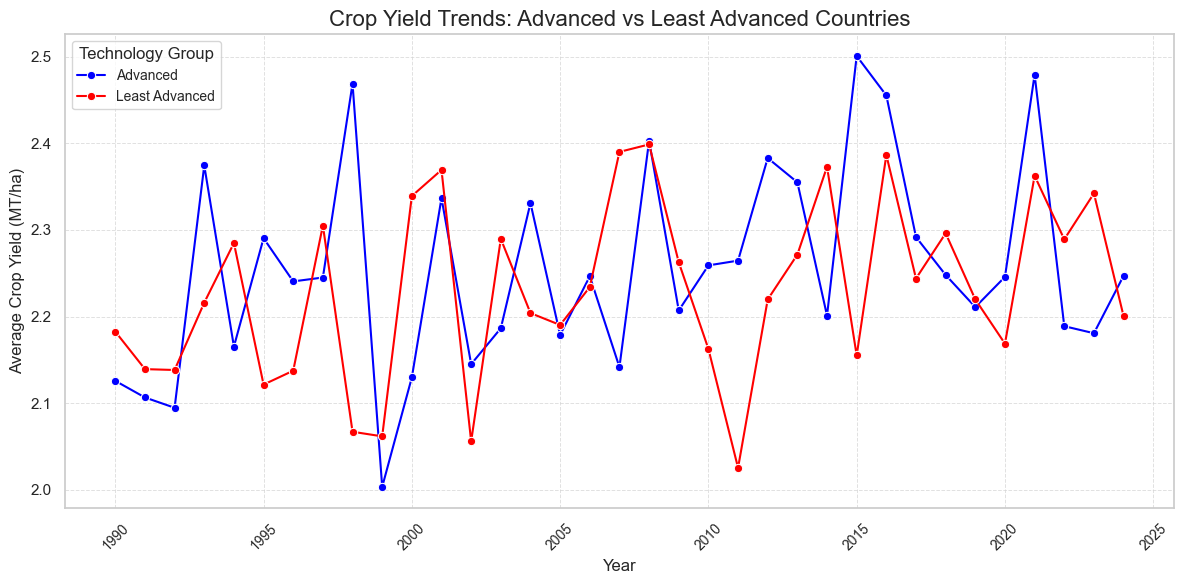

In [316]:
grouped_data = data.groupby(["Year", "Tech_Group"]).agg({
    "Crop_Yield_MT_per_HA": "mean",
    "Climate_Risk_Index": "mean"
}).reset_index()

filtered_data = grouped_data[grouped_data["Tech_Group"] != "Others"]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x="Year",
    y="Crop_Yield_MT_per_HA",
    hue="Tech_Group",
    marker="o",
    palette={"Advanced": "blue", "Least Advanced": "red"}  # Exclude 'Others'
)

#labels
plt.title("Crop Yield Trends: Advanced vs Least Advanced Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Crop Yield (MT/ha)", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.grid(color="lightgrey", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(title="Technology Group", fontsize=10)
plt.tight_layout()
plt.show()

## Regional Examples

This is where we could end on a positive where we could exemplify where specific places have had success implementing adaption strategies and maintaining yields and boasting a strong economy. This could come from look at patterns over time like if a country/region had been hit by a tsunami the year before, how have water management systems managed to restore some of the crop yield after previous devastation. 

In [79]:
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")

In [104]:
data.head()

Year Country            Region   Crop_Type  Average_Temperature_C  \
880   1990  Canada  British Columbia        Corn                  30.65   
5258  1990  Canada  British Columbia      Fruits                  30.76   
982   1990  Canada  British Columbia   Sugarcane                   8.36   
8200  1990  Canada  British Columbia      Barley                  13.08   
1073  1990  Canada  British Columbia  Vegetables                  -4.68   

      Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
880                  2817.06             19.89                 2.718   
5258                 2021.05              9.61                 1.650   
982                  2284.90             16.25                 2.439   
8200                  210.11             14.81                 1.530   
1073                 2642.61             25.02                 1.530   

      Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
880                        8                29.12                     0.69   
5258                       4                61.75                    33.91   
982                        6                36.39                     4.43   
8200                       4                72.06                    40.21   
1073                      10                31.75                    31.72   

      Fertilizer_Use_KG_per_HA  Soil_Health_Index    Adaptation_Strategies  \
880                      90.03              59.37  Drought-resistant Crops   
5258                     79.05              32.70            No Adaptation   
982                      74.97              35.29          Organic Farming   
8200                     92.97              61.06         Water Management   
1073                     66.64              92.82            Crop Rotation   

      Economic_Impact_Million_USD Adaptation_Status  Climate_Risk_Index  \
880                       1269.06   With Adaptation          249.701843   
5258                       304.47     No Adaptation           88.532844   
982                        322.32   With Adaptation          135.582844   
8200                       244.79   With Adaptation         -278.959156   
1073                       209.04   With Adaptation          205.212844   

      Tech_Access_Score Tech_Group  Yearly_Change  
880              119.84     Others            NaN  
5258             174.71     Others           0.11  
982              115.79     Others         -22.40  
8200             205.24     Others           4.72  
1073             130.11     Others         -17.76

### This plot shows that in the USA, adaptation strategies do not impact economic impact but they might impact crop yield.

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\867163576.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



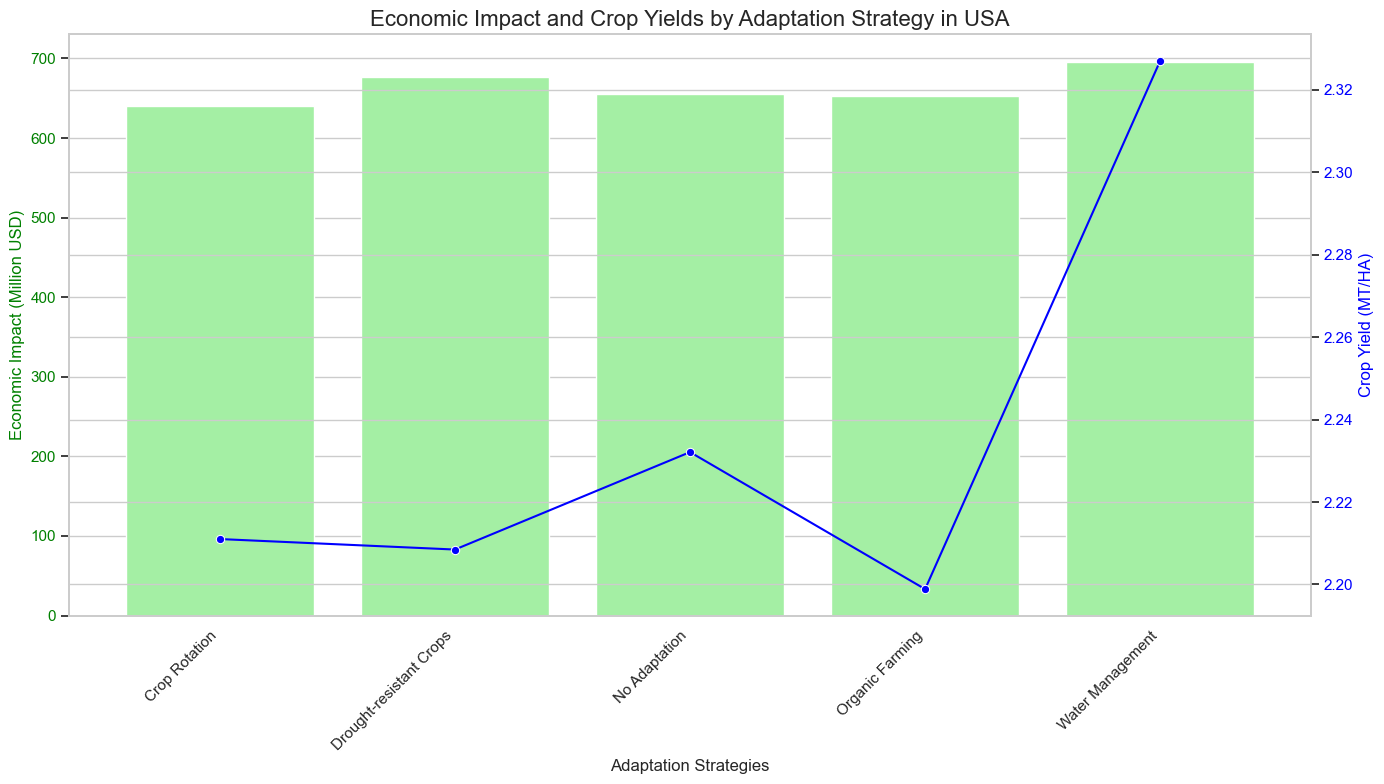

In [197]:
usa_data = data[data["Country"] == "USA"]

# combining economic impact by adaptation strategy
usa_strategies = usa_data.groupby("Adaptation_Strategies").agg({
    "Economic_Impact_Million_USD": "mean",
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

# plot adaptation strategies
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(
    data=usa_strategies,
    x="Adaptation_Strategies",
    y="Economic_Impact_Million_USD",
    color="palegreen",
    ax=ax1
)
ax1.set_xlabel("Adaptation Strategies", fontsize=12)
ax1.set_ylabel("Economic Impact (Million USD)", fontsize=12, color="green")
ax1.tick_params(axis="y", labelcolor="green")
ax1.set_xticklabels(usa_strategies["Adaptation_Strategies"], rotation=45, ha="right")

# line plot for crop yield
ax2 = ax1.twinx()
sns.lineplot(
    data=usa_strategies,
    x="Adaptation_Strategies",
    y="Crop_Yield_MT_per_HA",
    color="blue",
    marker="o",
    ax=ax2
)
ax2.set_ylabel("Crop Yield (MT/HA)", fontsize=12, color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Economic Impact and Crop Yields by Adaptation Strategy in USA", fontsize=16)
plt.tight_layout()
plt.show()

## In contrast, these show that adaptation strategies might not really contribute much to crop yield. 

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\314267193.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




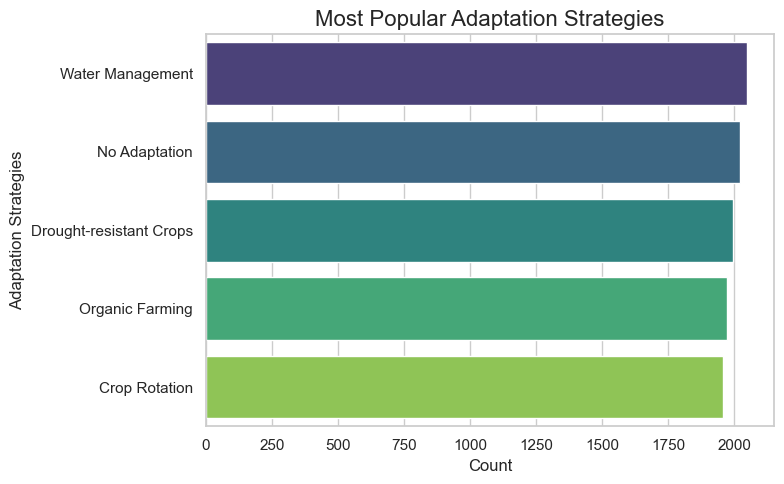

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\314267193.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




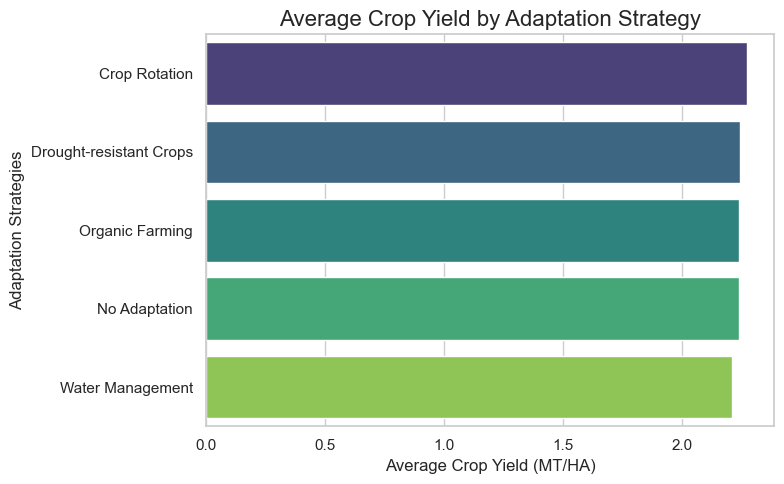

In [194]:
# occurrences of each adaptation strategy
strategy_counts = data["Adaptation_Strategies"].value_counts().reset_index()
strategy_counts.columns = ["Adaptation_Strategies", "Count"]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(
    data=strategy_counts,
    x="Count",
    y="Adaptation_Strategies",
    palette="viridis"
)

# labels
plt.title("Most Popular Adaptation Strategies", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Adaptation Strategies", fontsize=12)
plt.tight_layout()
plt.show()



# grouping by adaptation strategies and find mean crop yield
strategy_yield = data.groupby("Adaptation_Strategies").agg({
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

# Sort by crop yield
strategy_yield = strategy_yield.sort_values(by="Crop_Yield_MT_per_HA", ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(
    data=strategy_yield,
    x="Crop_Yield_MT_per_HA",
    y="Adaptation_Strategies",
    palette="viridis"
)
plt.title("Average Crop Yield by Adaptation Strategy", fontsize=16)
plt.xlabel("Average Crop Yield (MT/HA)", fontsize=12)
plt.ylabel("Adaptation Strategies", fontsize=12)
plt.tight_layout()
plt.show()

# Here are a few 2024 Global Mapping Plots
(For like 'Here is where we are today in terms of __') 
<br>Maybe put side-by-side on website

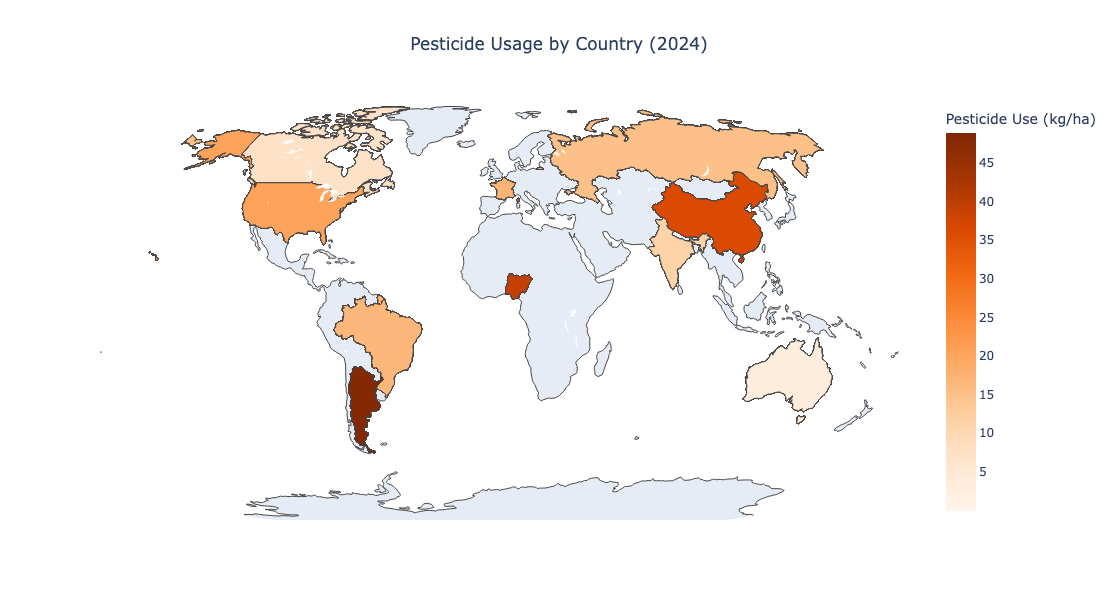

In [195]:
import plotly.express as px

recent_data = data[data["Year"] == 2024]

# map for pesticide usage
fig = px.choropleth(
    recent_data,
    locations="Country",
    locationmode="country names",
    color="Pesticide_Use_KG_per_HA",
    hover_name="Country",
    title="Pesticide Usage by Country (2024)",
    color_continuous_scale="Oranges",
    labels={"Pesticide_Use_KG_per_HA": "Pesticide Use (kg/ha)"}
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)

fig.show()

### Crop Yield by Country (Global Map)

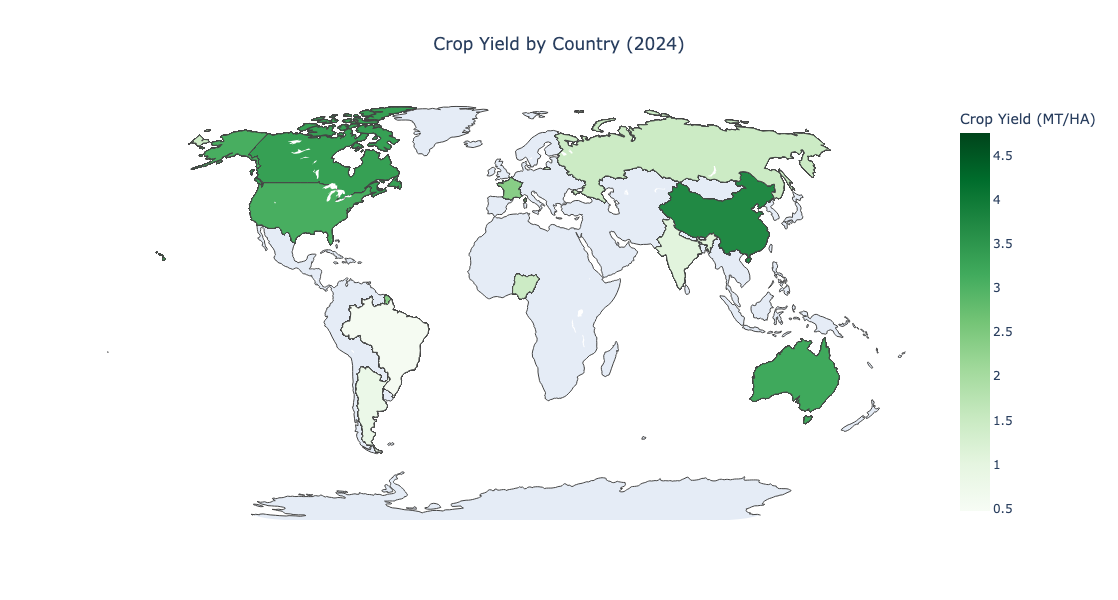

In [196]:
# map for crop yield
fig = px.choropleth(
    recent_data,
    locations="Country",
    locationmode="country names",
    color="Crop_Yield_MT_per_HA",
    hover_name="Country",
    title="Crop Yield by Country (2024)",
    color_continuous_scale="Greens",
    labels={"Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)"}
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)

fig.show()

## Total (Summed) Temperature Change Global Map

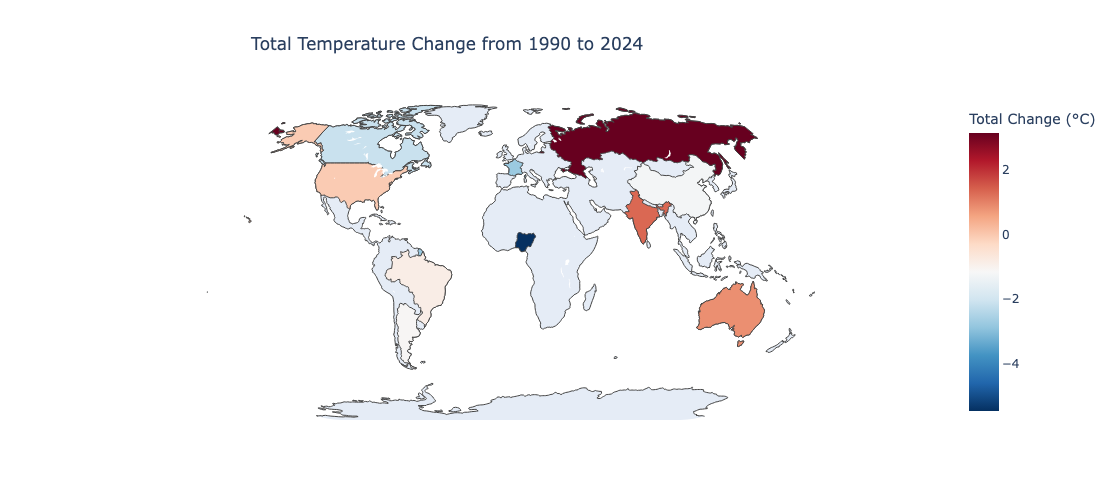

In [28]:
# Ensure Year and Temperature columns are numeric
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data = data.dropna(subset=["Year", "Average_Temperature_C", "Country"])

# Filter data for 1990 and 2024 only
data_1990 = data[data["Year"] == 1990].groupby("Country")["Average_Temperature_C"].mean().reset_index()
data_2024 = data[data["Year"] == 2024].groupby("Country")["Average_Temperature_C"].mean().reset_index()

# Merge the 1990 and 2024 average temperature data for each country
temp_change = pd.merge(data_1990, data_2024, on="Country", suffixes=("_1990", "_2024"))

# Calculate the total temperature change between 1990 and 2024 (2024 - 1990)
temp_change["Total_Change"] = temp_change["Average_Temperature_C_2024"] - temp_change["Average_Temperature_C_1990"]

# Create choropleth map with reversed color scale
fig = px.choropleth(
    temp_change,
    locations="Country",
    locationmode="country names",
    color="Total_Change",
    hover_name="Country",
    title="Total Temperature Change from 1990 to 2024",
    color_continuous_scale="RdBu_r",  # Reversed color scale: Hotter = Red, Cooler = Blue
    labels={"Total_Change": "Total Change (°C)"}
)

fig.update_layout(
    autosize=True,
    width=None,
    height=500,
    title_x=0.4,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    )
)

fig.show()

fig.write_html('global_temp_change.html')


### Continuing the search of 'does this directly contribute to crop yield' , this shows pesticide and fertilizer use don't vary much between these countries, whereas crop yield really varies. Therefore, pesticide and fertilizer are not very assiciated with crop yield within our dataset.

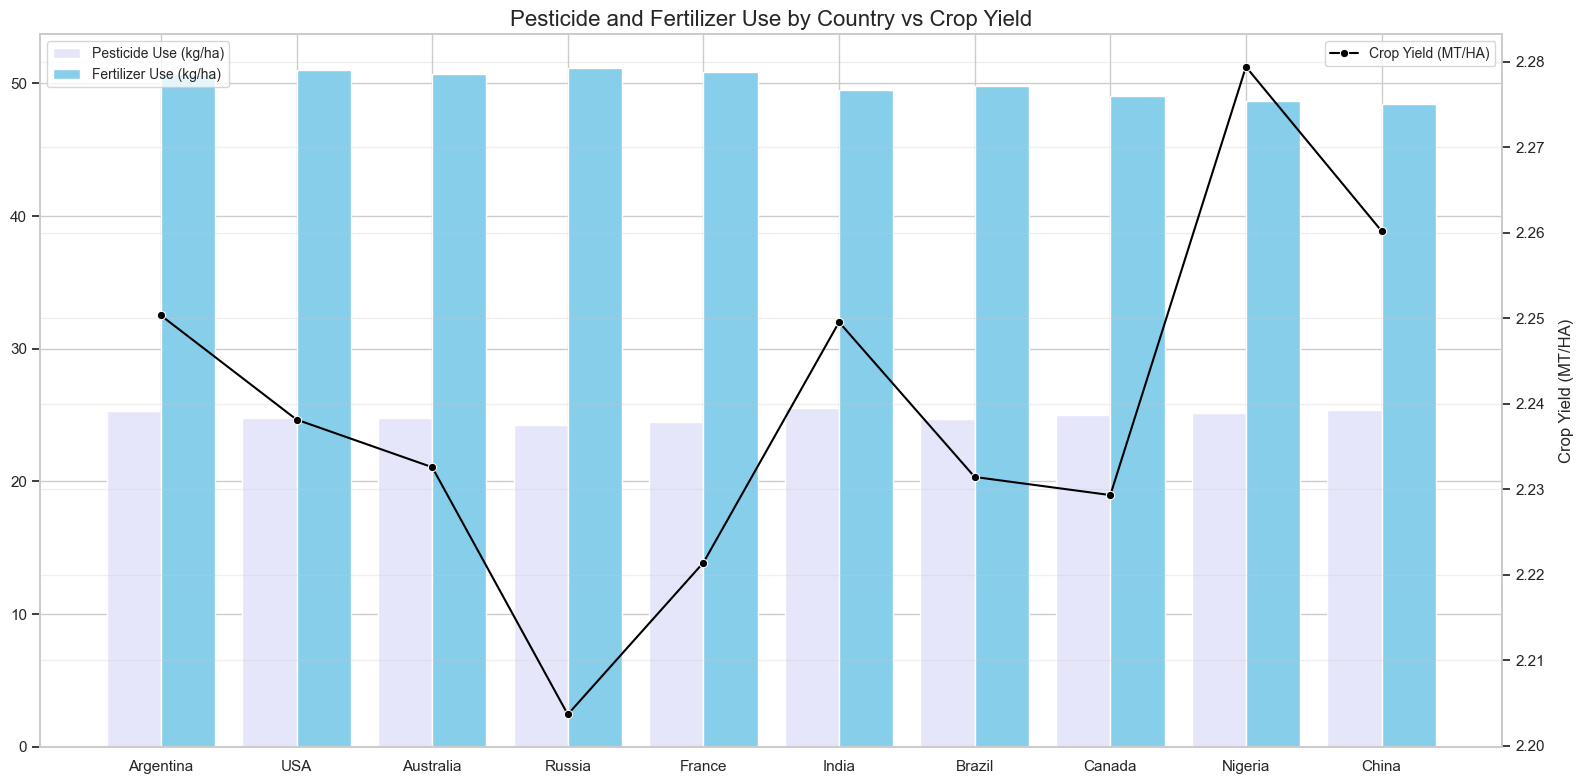

In [198]:
# combining pesticide, fertilizer use, and crop yield by country
agriculture_data = data.groupby("Country").agg({
    "Pesticide_Use_KG_per_HA": "mean",
    "Fertilizer_Use_KG_per_HA": "mean",
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

# sorting by combined pesticide and fertilizer use
agriculture_data["Total_Input_Use"] = agriculture_data["Pesticide_Use_KG_per_HA"] + agriculture_data["Fertilizer_Use_KG_per_HA"]
agriculture_data = agriculture_data.sort_values(by="Total_Input_Use", ascending=False)

plt.figure(figsize=(16, 8))
width = 0.4  
x = range(len(agriculture_data["Country"]))

# pesticide use
pesticide_bars = plt.bar(
    x=[i - width / 2 for i in x],
    height=agriculture_data["Pesticide_Use_KG_per_HA"],
    width=width,
    label="Pesticide Use (kg/ha)",
    color="lavender"
)

# fertilizer use
fertilizer_bars = plt.bar(
    x=[i + width / 2 for i in x],
    height=agriculture_data["Fertilizer_Use_KG_per_HA"],
    width=width,
    label="Fertilizer Use (kg/ha)",
    color="skyblue"
)

# crop yield line
ax2 = plt.gca().twinx()
crop_yield_line = sns.lineplot(
    data=agriculture_data,
    x=x,
    y=agriculture_data["Crop_Yield_MT_per_HA"],
    color="black",
    marker="o",
    ax=ax2,
    label="Crop Yield (MT/HA)"
)

plt.xticks(x, agriculture_data["Country"], rotation=45)
plt.title("Pesticide and Fertilizer Use by Country vs Crop Yield", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Input Use (kg/ha)", fontsize=12, labelpad=10)
ax2.set_ylabel("Crop Yield (MT/HA)", fontsize=12, labelpad=10)

#had legend issues so combining them
bars_legend = plt.legend(
    handles=[pesticide_bars, fertilizer_bars],
    labels=["Pesticide Use (kg/ha)", "Fertilizer Use (kg/ha)"],
    loc="upper left",
    fontsize=10
)
plt.gca().add_artist(bars_legend) 
ax2.legend(loc="upper right", fontsize=10) 

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### This model (below) shows that in our dataset the countries with highest vs. lowest technology did not have much difference in climate risk, indicating that either technology does not have a big impact on climate risk inherently or that our countries don't have enough technological range in order to prove a significant difference in climate risk.

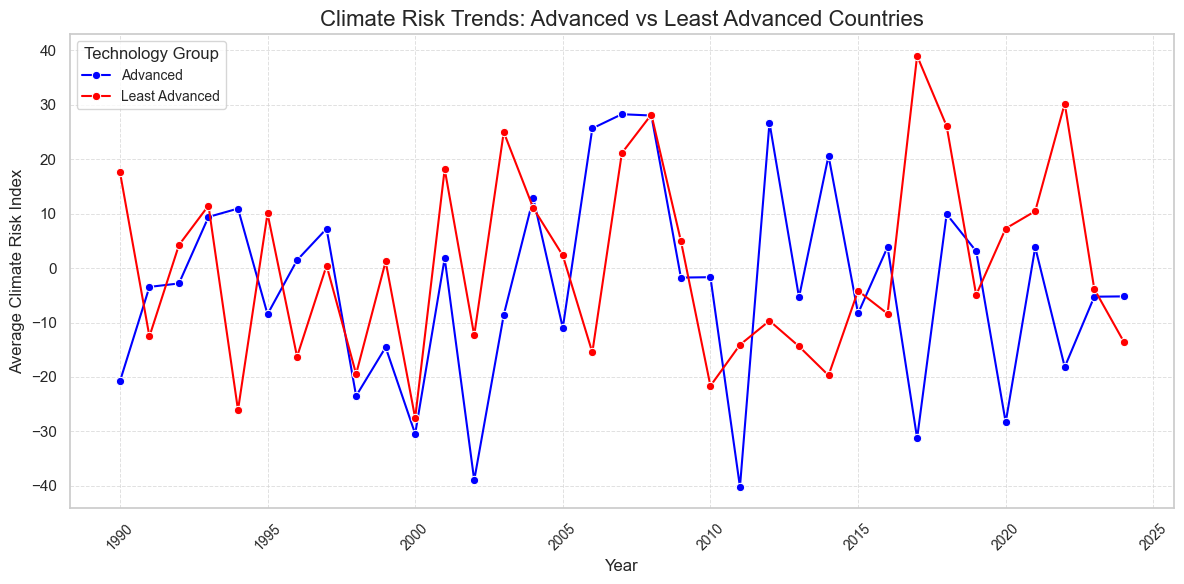

In [184]:
filtered_data = grouped_data[grouped_data["Tech_Group"] != "Others"]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x="Year",
    y="Climate_Risk_Index",
    hue="Tech_Group",
    marker="o",
    palette={"Advanced": "blue", "Least Advanced": "red"}  # Exclude 'Others'
)

# labels
plt.title("Climate Risk Trends: Advanced vs Least Advanced Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Climate Risk Index", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.grid(color="lightgrey", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(title="Technology Group", fontsize=10)
plt.tight_layout()
plt.show()

## Climate Risk and Crop Yield by Year
This visual shows crop yields and climate risk are very similar across the years in their variation. This could imply climate change directly impacts crop yields.

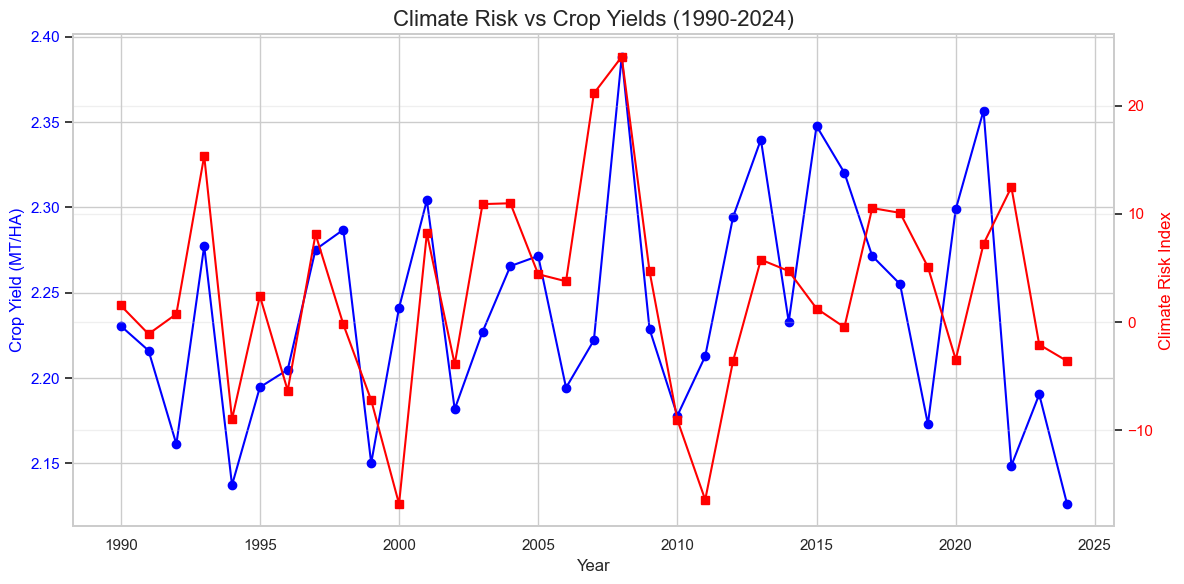

In [202]:
#climate risk index
data["Climate_Risk_Index"] = (
    data["Extreme_Weather_Events"] * 0.5 +
    (data["Average_Temperature_C"] - data["Average_Temperature_C"].mean()) * 0.3 +
    (data["Total_Precipitation_mm"] - data["Total_Precipitation_mm"].mean()) * 0.2
)

# data by year
climate_yield_data = data.groupby("Year").agg({
    "Climate_Risk_Index": "mean",
    "Crop_Yield_MT_per_HA": "mean"
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

#crop yield plot
ax1.plot(
    climate_yield_data["Year"],
    climate_yield_data["Crop_Yield_MT_per_HA"],
    label="Crop Yield (MT/HA)",
    color="blue",
    marker="o"
)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Crop Yield (MT/HA)", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# climate risk index plot
ax2 = ax1.twinx()
ax2.plot(
    climate_yield_data["Year"],
    climate_yield_data["Climate_Risk_Index"],
    label="Climate Risk Index",
    color="red",
    marker="s"
)
ax2.set_ylabel("Climate Risk Index", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.xticks(rotation=45)
plt.title("Climate Risk vs Crop Yields (1990-2024)", fontsize=16)
fig.tight_layout()
plt.grid(alpha=0.3)
plt.show()

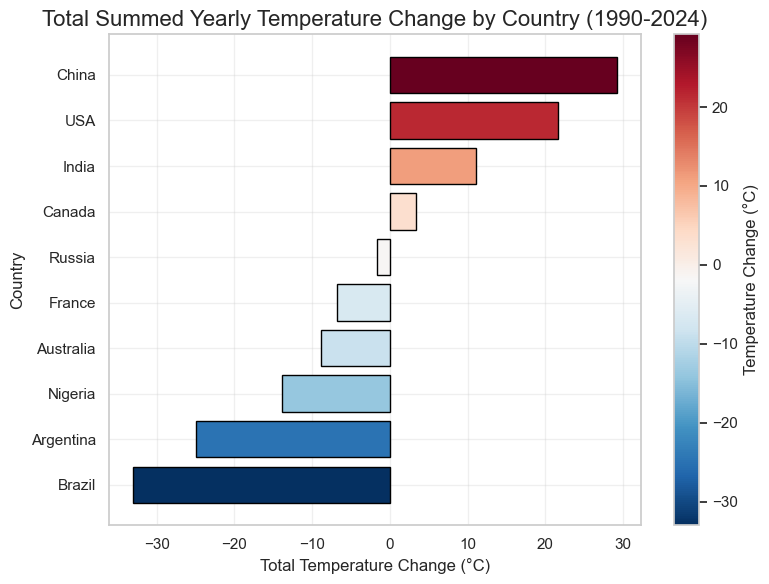

In [234]:
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data = data.dropna(subset=["Year", "Average_Temperature_C", "Country"])

data = data.sort_values(by=["Country", "Year"])

# yearly temperature changes for each country
data["Yearly_Change"] = data.groupby("Country")["Average_Temperature_C"].diff()

# sum yearly changes by country
country_change = (
    data.groupby("Country")["Yearly_Change"].sum().reset_index()
)
country_change.rename(
    columns={"Yearly_Change": "Total_Yearly_Change"}, inplace=True
)

# sorting
country_change = country_change.sort_values(by="Total_Yearly_Change", ascending=True)

# color values
norm = Normalize(vmin=country_change["Total_Yearly_Change"].min(),
                 vmax=country_change["Total_Yearly_Change"].max())
colors = cm.RdBu_r(norm(country_change["Total_Yearly_Change"]))  # Use reversed colormap

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(
    country_change["Country"],
    country_change["Total_Yearly_Change"],
    color=colors,
    edgecolor="black"
)

ax.set_title("Total Summed Yearly Temperature Change by Country (1990-2024)", fontsize=16)
ax.set_xlabel("Total Temperature Change (°C)", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.grid(alpha=0.3)

# gradient colorbar
sm = plt.cm.ScalarMappable(cmap=cm.RdBu_r, norm=norm)  # Use reversed colormap for colorbar
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.set_label("Temperature Change (°C)", fontsize=12)

plt.tight_layout()
plt.show()

## CLOSURE:
See for yourself: What factors seem to follow the patterns of climate risk? 
<br>(Check out crop yield, soil health)

In [358]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# convert to numeric
data_copy = data.copy()
for col in data.columns:
    if col not in ["Country", "Region", "Crop_Type", "Adaptation_Strategies"]:
        data_copy[col] = pd.to_numeric(data[col], errors="coerce")

countries_data = data_copy[data_copy["Country"].isin(["Russia", "Nigeria"])]

# data by country
aggregated_data = countries_data.groupby("Country").mean(numeric_only=True).reset_index()

#labels for dropdown
column_labels = {
    "Soil_Health_Index": "Soil Health Index",
    "Economic_Impact_Million_USD": "Economic Impact (Million USD)",
    "Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)",
    "Average_Temperature_C": "Average Temperature (°C)",
    "Total_Precipitation_mm": "Total Precipitation (mm)",
    "Extreme_Weather_Events": "Extreme Weather Events",
    "Fertilizer_Use_KG_per_HA": "Fertilizer Use (kg/ha)",
    "Pesticide_Use_KG_per_HA": "Pesticide Use (kg/ha)",
}

reverse_labels = {v: k for k, v in column_labels.items()}

#feature comparison
def plot_comparison(feature_label):
    feature = reverse_labels[feature_label]
    fig = px.bar(
        aggregated_data,
        x="Country",
        y=feature,
        color="Country",
        title=f"{feature_label} Comparison: Russia vs Nigeria",
        labels={feature: feature_label, "Country": "Country"},
    )
    fig.update_traces(texttemplate="%{y:.2f}", textposition="outside")
    fig.update_layout(
        yaxis_title=feature_label,
        xaxis_title="Country",
        title_x=0.5,
        uniformtext_minsize=8,
        uniformtext_mode="hide",
    )
    fig.show()

# dropdown widget
interact(
    plot_comparison,
    feature_label=widgets.Dropdown(
        options=list(column_labels.values()),
        description="Select a Feature:",
        style={"description_width": "initial"},
    ),
)

interactive(children=(Dropdown(description='Select a Feature:', options=('Soil Health Index', 'Economic Impact…

<function __main__.plot_comparison(feature_label)>

In [236]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is already loaded and scaled in `scaled_data`

# Function to save plot as HTML
def save_plot_html(variable):
    fig = px.line(
        scaled_data,
        x="Year",
        y=[variable, "Climate_Risk_Index"],
        labels={"value": "Scaled Value (0-1)", "Year": "Year"},
        title=f"Climate Risk Index vs {variable} (Scaled, 1990-2024)",
    )
    fig.write_html("interactive_plot.html")
    print("Plot saved as interactive_plot.html")

# Save an example plot
save_plot_html(columns[0])

Plot saved as interactive_plot.html


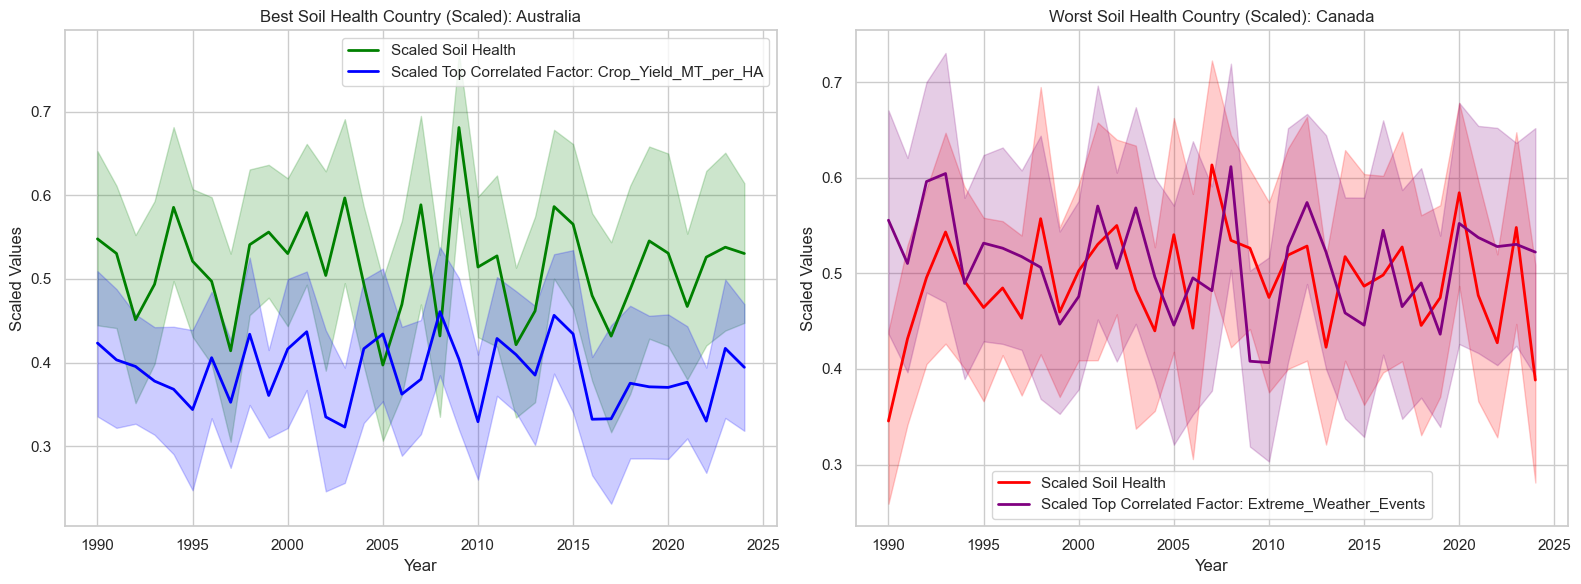

In [303]:
# average soil health by country
country_soil_means = data.groupby('Country')['Soil_Health_Index'].mean()

#  best and worst soil health
best_soil_country = country_soil_means.idxmax()  # Country with the best soil health (highest index)
worst_soil_country = country_soil_means.idxmin()  # Country with the worst soil health (lowest index)

best_country_data = data[data['Country'] == best_soil_country]
worst_country_data = data[data['Country'] == worst_soil_country]

numeric_cols = data.select_dtypes(include=['number']).columns.drop(['Soil_Health_Index', 'Year'])

# Best country correlations
best_country_corrs = best_country_data[numeric_cols].corrwith(best_country_data['Soil_Health_Index'])
best_country_top_factor = best_country_corrs.abs().idxmax()

# Worst country correlations
worst_country_corrs = worst_country_data[numeric_cols].corrwith(worst_country_data['Soil_Health_Index'])
worst_country_top_factor = worst_country_corrs.abs().idxmax()

scaler = MinMaxScaler()

# Scale for best country
best_country_data_scaled = best_country_data.copy()
best_country_data_scaled[['Scaled_Soil_Health_Index', f'Scaled_{best_country_top_factor}']] = scaler.fit_transform(
    best_country_data[['Soil_Health_Index', best_country_top_factor]]
)

# Scale for worst country
worst_country_data_scaled = worst_country_data.copy()
worst_country_data_scaled[['Scaled_Soil_Health_Index', f'Scaled_{worst_country_top_factor}']] = scaler.fit_transform(
    worst_country_data[['Soil_Health_Index', worst_country_top_factor]]
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Best country plot
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y="Scaled_Soil_Health_Index",
    label="Scaled Soil Health",
    ax=axes[0],
    color="green",
    linewidth=2,
)
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y=f'Scaled_{best_country_top_factor}',
    label=f"Scaled Top Correlated Factor: {best_country_top_factor}",
    ax=axes[0],
    color="blue",
    linewidth=2,
)
axes[0].set_title(f"Best Soil Health Country (Scaled): {best_soil_country}")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Scaled Values")
axes[0].legend()
axes[0].grid(True)

# Worst country plot
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y="Scaled_Soil_Health_Index",
    label="Scaled Soil Health",
    ax=axes[1],
    color="red",
    linewidth=2,
)
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y=f'Scaled_{worst_country_top_factor}',
    label=f"Scaled Top Correlated Factor: {worst_country_top_factor}",
    ax=axes[1],
    color="purple",
    linewidth=2,
)
axes[1].set_title(f"Worst Soil Health Country (Scaled): {worst_soil_country}")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Scaled Values")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Most Uncorrelated Factor: Fertilizer_Use_KG_per_HA
Correlation with Climate Risk Index in Australia: -0.042
Correlation with Climate Risk Index in Canada: 0.045


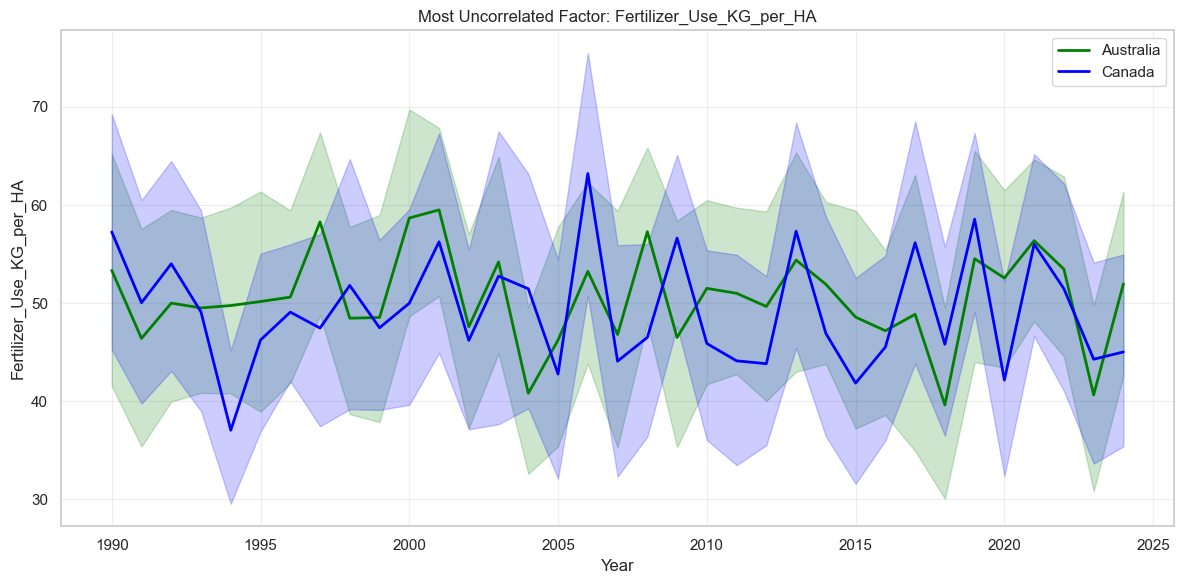

In [304]:
countries_of_interest = ['Australia', 'Canada']
filtered_data = data[data['Country'].isin(countries_of_interest)]

columns_to_exclude = ['Extreme_Weather_Events', 'Total_Precipitation_mm', 'Average_Temperature_C', 'Year', 'Climate_Risk_Index']
numeric_cols = [col for col in filtered_data.select_dtypes(include=['number']).columns if col not in columns_to_exclude]

# correlations with Climate Risk Index for each country
brazil_data = filtered_data[filtered_data['Country'] == 'Australia']
france_data = filtered_data[filtered_data['Country'] == 'Canada']

brazil_corrs = brazil_data[numeric_cols].corrwith(brazil_data['Climate_Risk_Index'])
france_corrs = france_data[numeric_cols].corrwith(france_data['Climate_Risk_Index'])

# most uncorrelated factor (largest difference in correlation)
correlation_diff = abs(brazil_corrs - france_corrs)
most_uncorrelated_factor = correlation_diff.idxmax()

print(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
print(f"Correlation with Climate Risk Index in Australia: {brazil_corrs[most_uncorrelated_factor]:.3f}")
print(f"Correlation with Climate Risk Index in Canada: {france_corrs[most_uncorrelated_factor]:.3f}")

plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x="Year", y=most_uncorrelated_factor, label="Australia", color="green", linewidth=2)
sns.lineplot(data=france_data, x="Year", y=most_uncorrelated_factor, label="Canada", color="blue", linewidth=2)
plt.title(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
plt.xlabel("Year")
plt.ylabel(most_uncorrelated_factor)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\1101591401.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\1101591401.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



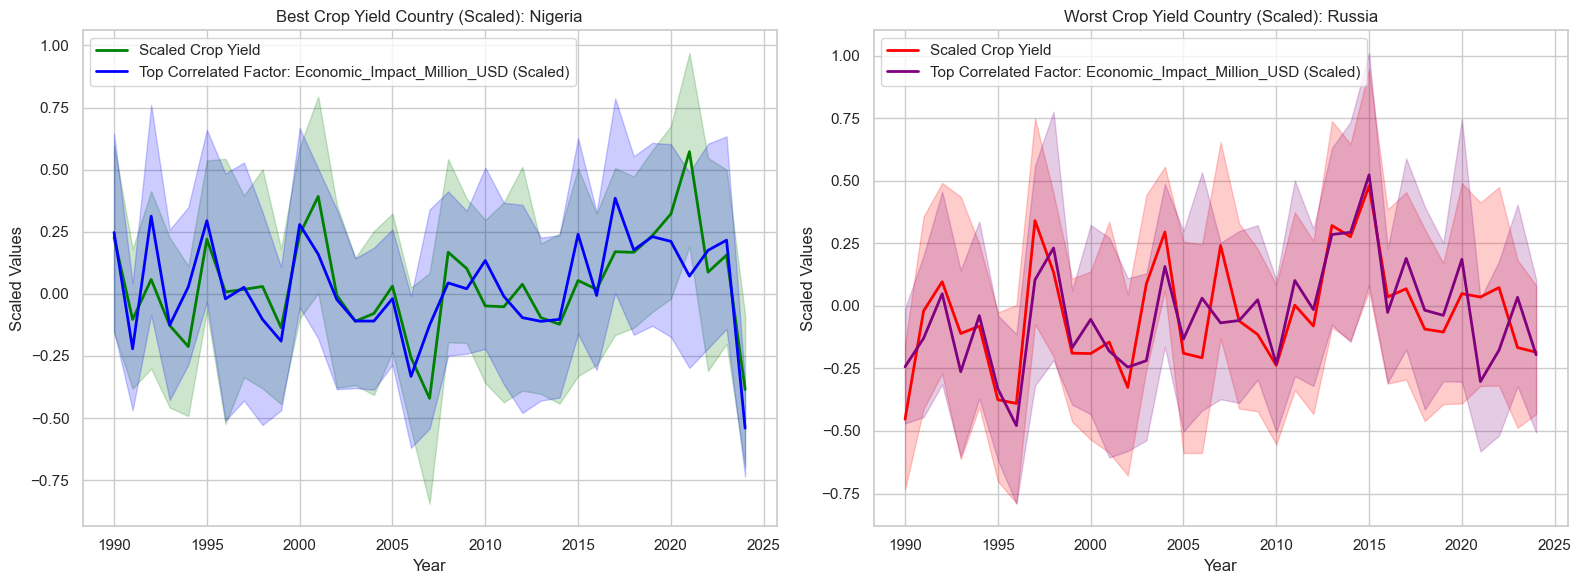

In [318]:
# average crop yield by country
country_crop_means = data.groupby('Country')['Crop_Yield_MT_per_HA'].mean()

best_crop_country = country_crop_means.idxmax()  # Country with the highest crop yield
worst_crop_country = country_crop_means.idxmin()  # Country with the lowest crop yield

best_country_data = data[data['Country'] == best_crop_country]
worst_country_data = data[data['Country'] == worst_crop_country]

scaler = StandardScaler()

best_country_data['Country_Label'] = 'Best'
worst_country_data['Country_Label'] = 'Worst'
combined_data = pd.concat([best_country_data, worst_country_data])

numeric_cols = combined_data.select_dtypes(include=['number']).columns.drop(['Year'])

# scaling
scaled_data = combined_data.copy()
scaled_data[numeric_cols] = scaler.fit_transform(combined_data[numeric_cols])

#best and worst country datasets
best_country_data_scaled = scaled_data[scaled_data['Country_Label'] == 'Best']
worst_country_data_scaled = scaled_data[scaled_data['Country_Label'] == 'Worst']

#correlations for the worst crop country
worst_country_corrs_scaled = worst_country_data_scaled[numeric_cols].corr()['Crop_Yield_MT_per_HA'].drop('Crop_Yield_MT_per_HA')
best_country_corrs_scaled = best_country_data_scaled[numeric_cols].corr()['Crop_Yield_MT_per_HA'].drop('Crop_Yield_MT_per_HA')

# factor most correlated with crop yield in the worst crop country
worst_country_top_factor_scaled = worst_country_corrs_scaled.abs().idxmax()
best_country_top_factor_scaled = best_country_corrs_scaled.abs().idxmax()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Best crop country plot (scaled)
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y="Crop_Yield_MT_per_HA",
    label="Scaled Crop Yield",
    ax=axes[0],
    color="green",
    linewidth=2,
)
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y=best_country_top_factor_scaled,
    label=f"Top Correlated Factor: {best_country_top_factor_scaled} (Scaled)",
    ax=axes[0],
    color="blue",
    linewidth=2,
)
axes[0].set_title(f"Best Crop Yield Country (Scaled): {best_crop_country}")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Scaled Values")
axes[0].legend()
axes[0].grid(True)

# Worst crop country plot (scaled)
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y="Crop_Yield_MT_per_HA",
    label="Scaled Crop Yield",
    ax=axes[1],
    color="red",
    linewidth=2,
)
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y=worst_country_top_factor_scaled,
    label=f"Top Correlated Factor: {worst_country_top_factor_scaled} (Scaled)",
    ax=axes[1],
    color="purple",
    linewidth=2,
)
axes[1].set_title(f"Worst Crop Yield Country (Scaled): {worst_crop_country}")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Scaled Values")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

Most Uncorrelated Factor: Pesticide_Use_KG_per_HA
Correlation with Crop Yield in Nigeria: 0.018
Correlation with Crop Yield in Russia: -0.015


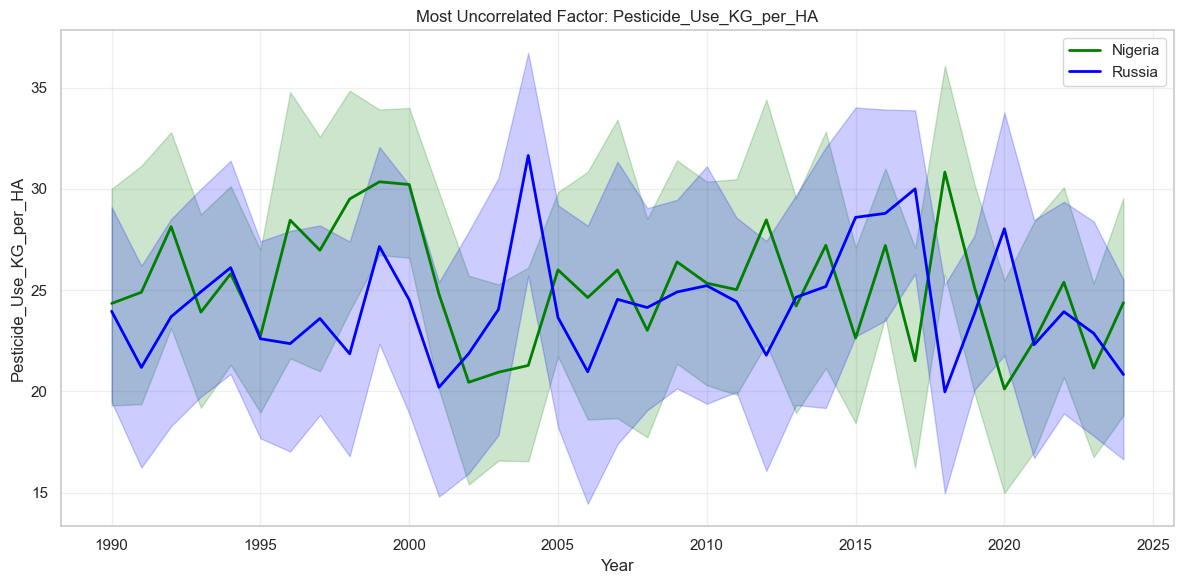

In [322]:
countries_of_interest = ['Nigeria', 'Russia']
filtered_data = data[data['Country'].isin(countries_of_interest)]

columns_to_exclude = ['Extreme_Weather_Events', 'Total_Precipitation_mm', 'Average_Temperature_C', 'Year', 'Climate_Risk_Index']
numeric_cols = [col for col in filtered_data.select_dtypes(include=['number']).columns if col not in columns_to_exclude]

# correlations with Climate Risk Index for each country
nigeria_data = filtered_data[filtered_data['Country'] == 'Nigeria']
russia_data = filtered_data[filtered_data['Country'] == 'Russia']

nigeria_corrs = nigeria_data[numeric_cols].corrwith(nigeria_data["Crop_Yield_MT_per_HA"])
russia_corrs = russia_data[numeric_cols].corrwith(russia_data["Crop_Yield_MT_per_HA"])

# most uncorrelated factor (largest difference in correlation)
correlation_diff = abs(nigeria_corrs - russia_corrs)
most_uncorrelated_factor = correlation_diff.idxmax()

#most uncorrelated factor and their correlations
print(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
print(f"Correlation with Crop Yield in Nigeria: {nigeria_corrs[most_uncorrelated_factor]:.3f}")
print(f"Correlation with Crop Yield in Russia: {russia_corrs[most_uncorrelated_factor]:.3f}")

# most uncorrelated factor for both countries

plt.figure(figsize=(12, 6))
sns.lineplot(data=nigeria_data, x="Year", y=most_uncorrelated_factor, label="Nigeria", color="green", linewidth=2)
sns.lineplot(data=russia_data, x="Year", y=most_uncorrelated_factor, label="Russia", color="blue", linewidth=2)
plt.title(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
plt.xlabel("Year")
plt.ylabel(most_uncorrelated_factor)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

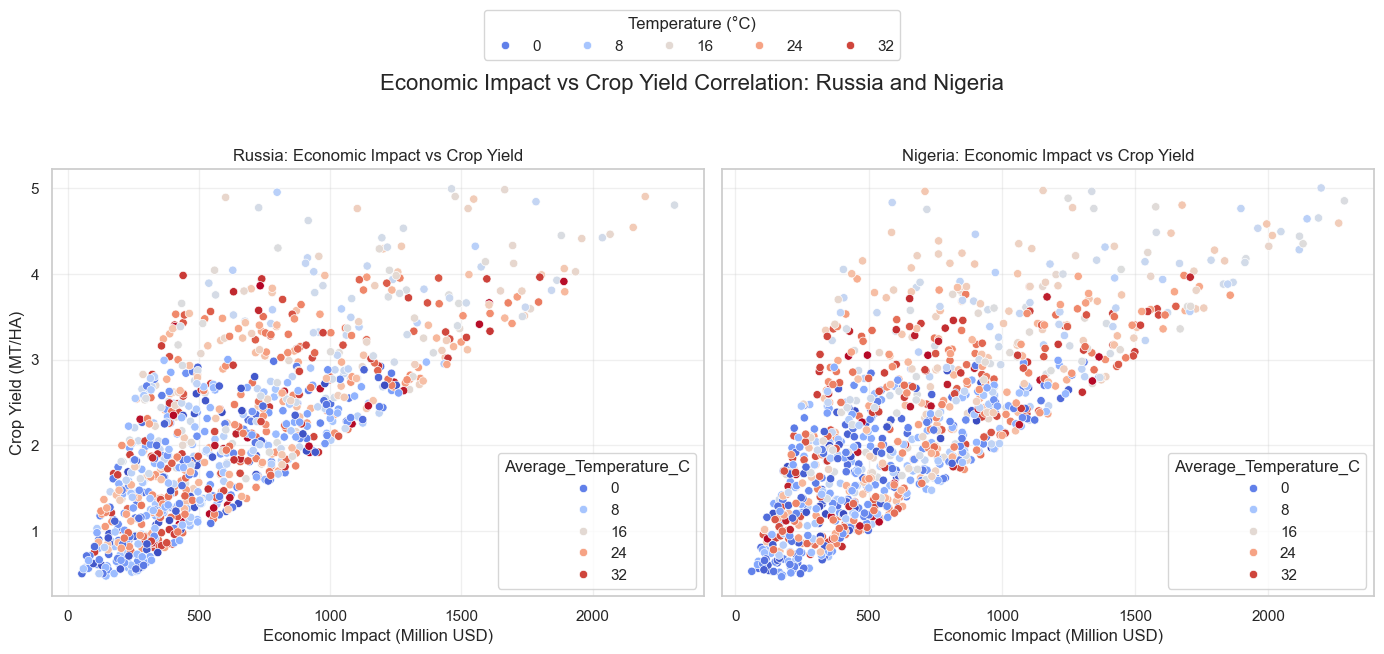

In [359]:
countries_data = data[data["Country"].isin(["Russia", "Nigeria"])]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Russia: Economic Impact vs Crop Yield
sns.scatterplot(
    data=countries_data[countries_data["Country"] == "Russia"],
    x="Economic_Impact_Million_USD",
    y="Crop_Yield_MT_per_HA",
    hue="Average_Temperature_C",
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Russia: Economic Impact vs Crop Yield", fontsize=12)
axes[0].set_xlabel("Economic Impact (Million USD)")
axes[0].set_ylabel("Crop Yield (MT/HA)")
axes[0].grid(alpha=0.3)

# Nigeria: Economic Impact vs Crop Yield
sns.scatterplot(
    data=countries_data[countries_data["Country"] == "Nigeria"],
    x="Economic_Impact_Million_USD",
    y="Crop_Yield_MT_per_HA",
    hue="Average_Temperature_C",
    palette="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Nigeria: Economic Impact vs Crop Yield", fontsize=12)
axes[1].set_xlabel("Economic Impact (Million USD)")
axes[1].grid(alpha=0.3)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", title="Temperature (°C)", bbox_to_anchor=(0.5, 1.1), ncol=5)
fig.suptitle("Economic Impact vs Crop Yield Correlation: Russia and Nigeria", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\395843907.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dulig\AppData\Local\Temp\ipykernel_77316\395843907.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



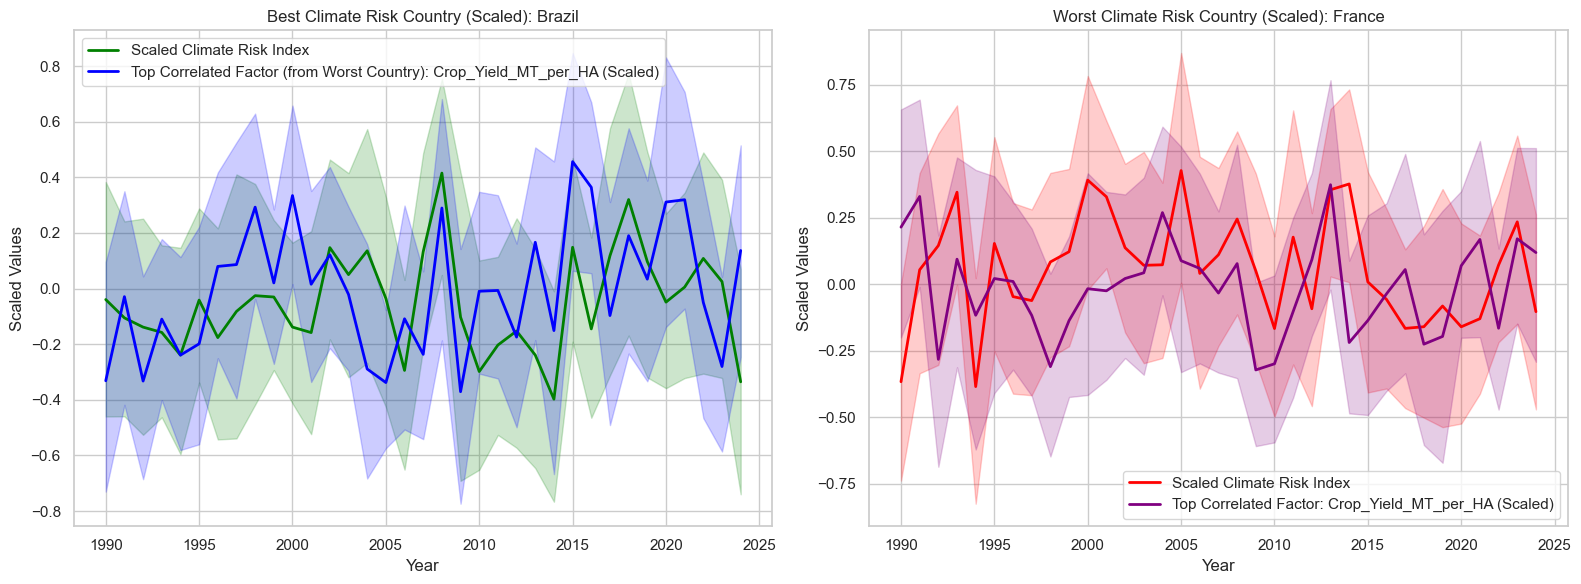

In [307]:
#average Climate Risk Index by country
country_climate_risk_means = data.groupby('Country')['Climate_Risk_Index'].mean()

best_climate_country = country_climate_risk_means.idxmin()  # Country with the lowest Climate Risk Index (best)
worst_climate_country = country_climate_risk_means.idxmax()  # Country with the highest Climate Risk Index (worst)

best_country_data = data[data['Country'] == best_climate_country]
worst_country_data = data[data['Country'] == worst_climate_country]

scaler = StandardScaler()

best_country_data['Country_Label'] = 'Best'
worst_country_data['Country_Label'] = 'Worst'
combined_data = pd.concat([best_country_data, worst_country_data])

columns_to_exclude = ['Extreme_Weather_Events', 'Total_Precipitation_mm', 'Average_Temperature_C', 'Year']
numeric_cols = [col for col in combined_data.select_dtypes(include=['number']).columns if col not in columns_to_exclude]

scaled_data = combined_data.copy()
scaled_data[numeric_cols] = scaler.fit_transform(combined_data[numeric_cols])

best_country_data_scaled = scaled_data[scaled_data['Country_Label'] == 'Best']
worst_country_data_scaled = scaled_data[scaled_data['Country_Label'] == 'Worst']

# correlations for the worst climate country
worst_country_corrs_scaled = worst_country_data_scaled[numeric_cols].corr()['Climate_Risk_Index'].drop('Climate_Risk_Index')

# factor most correlated with Climate Risk Index in the worst country
worst_country_top_factor_scaled = worst_country_corrs_scaled.abs().idxmax()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# best climate country plot (scaled)
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y="Climate_Risk_Index",
    label="Scaled Climate Risk Index",
    ax=axes[0],
    color="green",
    linewidth=2,
)
sns.lineplot(
    data=best_country_data_scaled,
    x="Year",
    y=worst_country_top_factor_scaled,
    label=f"Top Correlated Factor (from Worst Country): {worst_country_top_factor_scaled} (Scaled)",
    ax=axes[0],
    color="blue",
    linewidth=2,
)
axes[0].set_title(f"Best Climate Risk Country (Scaled): {best_climate_country}")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Scaled Values")
axes[0].legend()
axes[0].grid(True)

# worst climate country plot (scaled)
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y="Climate_Risk_Index",
    label="Scaled Climate Risk Index",
    ax=axes[1],
    color="red",
    linewidth=2,
)
sns.lineplot(
    data=worst_country_data_scaled,
    x="Year",
    y=worst_country_top_factor_scaled,
    label=f"Top Correlated Factor: {worst_country_top_factor_scaled} (Scaled)",
    ax=axes[1],
    color="purple",
    linewidth=2,
)
axes[1].set_title(f"Worst Climate Risk Country (Scaled): {worst_climate_country}")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Scaled Values")
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

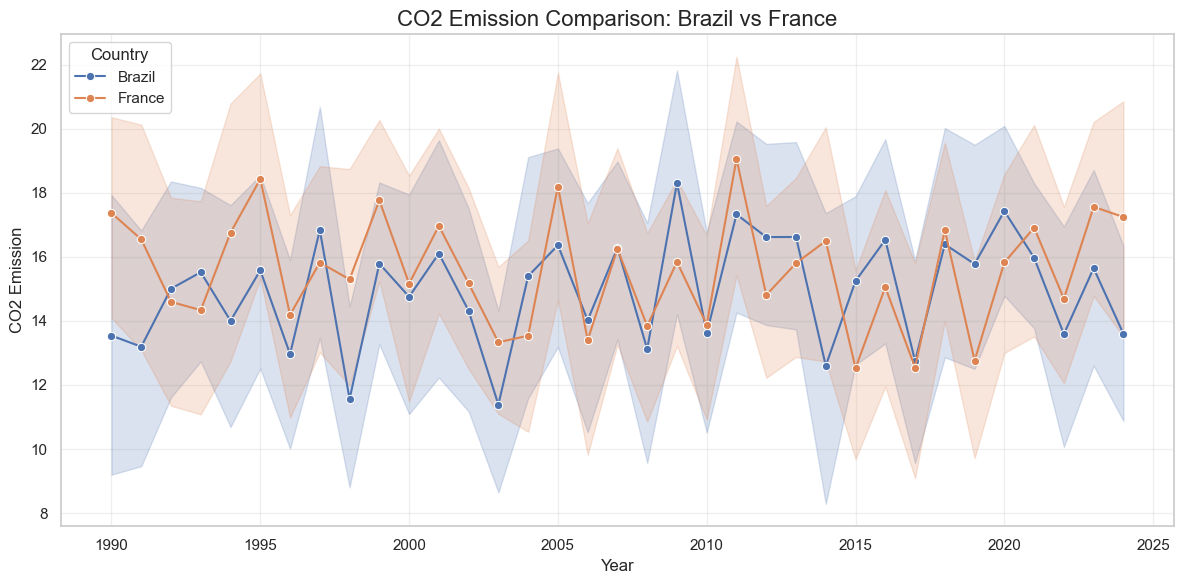

In [308]:
countries_to_compare = ["Brazil", "France"]
filtered_data = data[data['Country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_data,
    x="Year",
    y="CO2_Emissions_MT",
    hue="Country",
    marker="o"
)

plt.title("CO2 Emission Comparison: Brazil vs France", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emission", fontsize=12)
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Most Uncorrelated Factor: Crop_Yield_MT_per_HA
Correlation with Climate Risk Index in Brazil: -0.005
Correlation with Climate Risk Index in France: 0.063


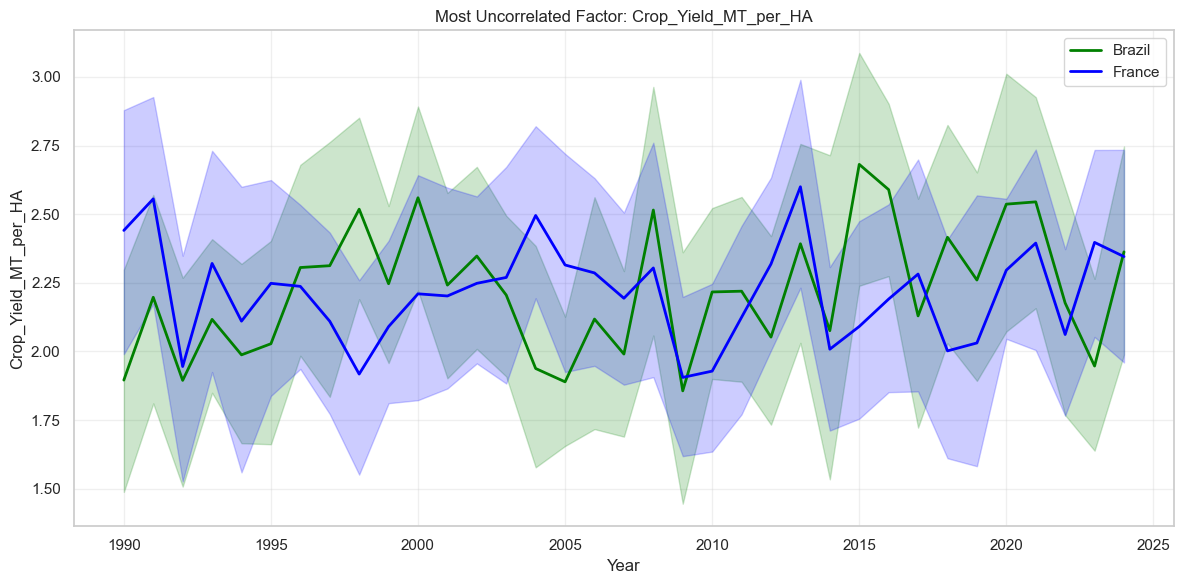

In [309]:
# Filter data for Brazil and France
countries_of_interest = ['Brazil', 'France']
filtered_data = data[data['Country'].isin(countries_of_interest)]

columns_to_exclude = ['Extreme_Weather_Events', 'Total_Precipitation_mm', 'Average_Temperature_C', 'Year', 'Climate_Risk_Index']
numeric_cols = [col for col in filtered_data.select_dtypes(include=['number']).columns if col not in columns_to_exclude]

# correlations with Climate Risk Index for each country
brazil_data = filtered_data[filtered_data['Country'] == 'Brazil']
france_data = filtered_data[filtered_data['Country'] == 'France']

brazil_corrs = brazil_data[numeric_cols].corrwith(brazil_data['Climate_Risk_Index'])
france_corrs = france_data[numeric_cols].corrwith(france_data['Climate_Risk_Index'])

# Find largest difference in correlation
correlation_diff = abs(brazil_corrs - france_corrs)
most_uncorrelated_factor = correlation_diff.idxmax()

print(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
print(f"Correlation with Climate Risk Index in Brazil: {brazil_corrs[most_uncorrelated_factor]:.3f}")
print(f"Correlation with Climate Risk Index in France: {france_corrs[most_uncorrelated_factor]:.3f}")

#most uncorrelated factor for both countries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x="Year", y=most_uncorrelated_factor, label="Brazil", color="green", linewidth=2)
sns.lineplot(data=france_data, x="Year", y=most_uncorrelated_factor, label="France", color="blue", linewidth=2)
plt.title(f"Most Uncorrelated Factor: {most_uncorrelated_factor}")
plt.xlabel("Year")
plt.ylabel(most_uncorrelated_factor)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()